<a href="https://colab.research.google.com/github/Schulich-Applied-Computing-in-Medicine/Workshops/blob/main/MINSTClassificationTutorialCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This tutorial will walk through building a simple model for the classification of handwritten digits (MINST dataset). In this tutorial, we will be working with the Keras python package. 

# Importing packages

In [ ]:
import numpy as np #This is a useful library for math operations
from tensorflow import keras #keras is a machine learning library
from tensorflow.keras import layers #this package lets use use the various layers that will go into the NN.
from matplotlib import pyplot as plt #this package will be used to plot the images

# Loading Data

The next cell will load the data and show examples. The load_data() function will automatically split the data into training and testing sets. The images are stored as "X" (since they are the inputs), and the labels of the data are stored in "Y"

11493376/11490434 [==============================] - 0s 0us/step


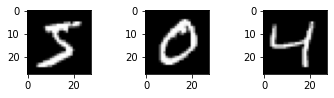

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
for i in range(3):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

For the first 3 images, this next cell will print out the label associated with the image. You can see that they correspond with the above images.

In [ ]:
for i in range(3):
    print(y_train[i])

5
0
4


# Building the model

Now that the data is loaded, we can build a neural network model. We will be following the example here: https://keras.io/examples/vision/mnist_convnet/
We will be building a convolution neural network, which is a type of neural network that is specailized for image classificaiton tasks. Rather than considering each pixel as a specific input, a series of convolution filters are applied to the input image.


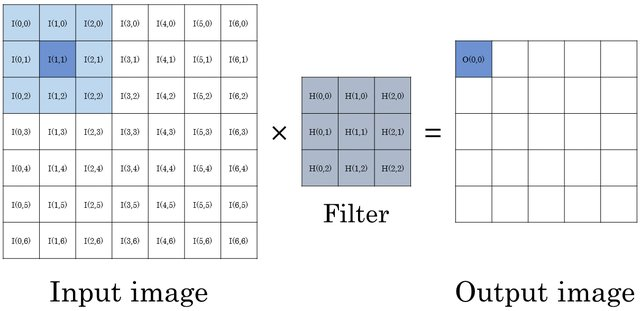

Depending on the neural network architecture, the input data must be proccessed before it is fed into the network. The to_categorical() function is used to turn the 1D array of labels into a (NxM) array, where N is the number of samples that you have, and M is the number of classes.

For example, let's say you have a problem with 3 classes, 0, 1, 2 and the first 5 samples you have are [0, 0, 1, 0, 2]. Applying the function turns those first 5 samples into:

0 -> (1, 0, 0)

0 -> (1, 0, 0)

1 -> (0, 1, 0)

0 -> (1, 0, 0)

2 -> (0, 0, 1)

Note for this tutorial, we have 10 classes, because we have 10 dgiits. 

In [ ]:
#The next 2 lines will scale the pixel values of the input so that they are between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1). Our input images are 28 pixels by 28 pixels.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1, 1)
60000 train samples
10000 test samples


Now we can actually create our model. Remember that our input images are 28x28 pixels.
You can see that our model has 7 layers. The first 4 layers are the convolution layers (filters). The flatten layer can be visualized below. A dropout layer is used to randomly dorpout connections from the previous layer, to reduce overfitting. Finally, the dense layer is the layer that will give us our prediction. Notice that there are 10 outputs, because we have 10 digits to predict.

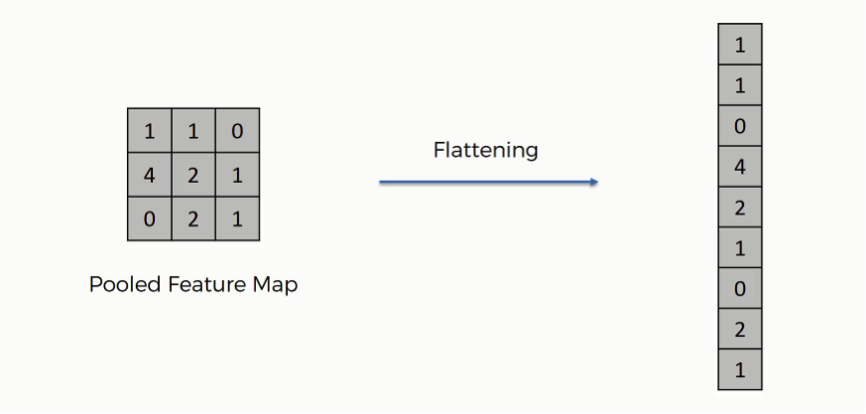

In [ ]:
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Training and testing

Now we are ready to train and evaluate the model. We will specificy the batch size to be 128 (128 images will be loaded at a time for learning) and the epoch to be 15 (the model will train for 15 iterations).

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 35s 6ms/step - loss: 2.1570 - accuracy: 0.2358 - val_loss: 0.6640 - val_accuracy: 0.8447
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.7680 - accuracy: 0.7635 - val_loss: 0.4004 - val_accuracy: 0.8937
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.5957 - accuracy: 0.8194 - val_loss: 0.3311 - val_accuracy: 0.9107
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.5122 - accuracy: 0.8447 - val_loss: 0.2748 - val_accuracy: 0.9267
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.4377 - accuracy: 0.8680 - val_loss: 0.2309 - val_accuracy: 0.9397
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3828 - accuracy: 0.8856 - val_loss: 0.1995 - val_accuracy: 0.9513
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3428 - accuracy: 0.8977 - val_loss: 0.1723 - val_accuracy: 0.9583
Epoch

The last (not really last because it's an iterative process) and arguably most important step is evaluation how well your model performed. As it turns out, digit classification is relatively easy, so even with a simple model trained in a short amount of time, we can get good results. Keep in mind, that simple "accuracy" is not often used, and instead metrics such as area under receiver operating curve (AUROC) are employed. Why would this be?

According to Wikipedia, the best model for MINST digit classification achieved an error of 0.25%, corresponding to an accuracy of 0.9975 (if error means what I think it means). In general, the higher your accuracy is already, the harder it is to make it better.


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1095849871635437
Test accuracy: 0.9684000015258789
